In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
#pip install fuzzywuzzy
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
path = "C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting_normalized.csv"
df = pd.read_csv(path, encoding='latin1')

In [3]:
df

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL
0,1.0,0.357143,0.558140,0.451748,0.613359,0.625,0.652174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.357143,0.604651,0.579439,0.417745,0.625,0.391304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.571429,0.883721,0.434122,0.536558,0.625,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.500000,0.860465,0.520532,0.633308,0.625,0.304348,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.500000,0.790698,0.347193,0.438044,0.625,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,1.0,0.500000,0.860465,0.467650,0.461908,1.000,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
118563,1.0,0.500000,0.604651,0.447814,0.577559,1.000,0.869565,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118564,0.0,0.357143,0.837209,0.381723,0.638353,1.000,0.782609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
118565,1.0,0.500000,0.837209,0.416223,0.603161,1.000,0.565217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# pca 

### כדי להחליט לכמה מימדים אנחנו רוצים לצמצם את הדאטה נחשב את יחס השונות המוסבר המצטבר

In [4]:
from sklearn.decomposition import PCA

In [5]:
# Create a PCA instance
pca = PCA()
pca.fit(df)

# Compute the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

יחס השונות המוסבר המצטבר

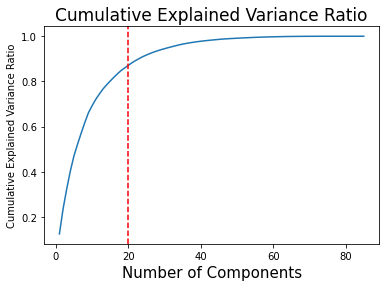

In [6]:
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio)
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio',fontsize=17)

plt.axvline(x=20, color='red', linestyle='--')

plt.show()

#### לפי הגרף ניתן לראות ש"נקודת המרפק" נמצאת כשנבחר ב20-30 מימדים
#### נבחר לצמצם את הדאטה מ85 עמודות ל20 עמודות 

In [7]:
n_components = 20 
pca = PCA(n_components)
df_pca = pca.fit_transform(df) #הדאטה לאחר הפחתת המימדים למספר הרצוי
df_pca = pd.DataFrame(df_pca) 
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.598268,-0.108719,-1.221948,-0.011565,-0.531337,-0.058432,-0.236670,-0.070581,-0.132735,-0.135593,-0.253393,-0.132957,0.117052,-0.129987,-0.235753,0.063606,-0.014989,0.890980,0.074289,-0.054034
1,1.244308,0.431499,-1.037999,-0.439086,-0.567716,-0.126313,-0.133953,0.102293,-0.288534,1.116817,-0.444273,0.355329,0.018733,-0.544454,-0.162325,0.142961,-0.065487,0.916679,0.020008,-0.103905
2,-0.618763,-0.427845,0.200915,0.039200,0.520165,-0.214895,-0.004318,-0.076622,1.184051,0.074242,-0.091602,0.692546,0.867906,0.469462,-0.296894,0.278934,0.025406,-0.328048,0.559542,0.990791
3,-0.721341,0.289374,-0.306330,-0.969800,-0.054458,0.798597,0.164836,-0.201942,-0.221718,1.100280,-0.453466,0.006417,-0.039612,0.298627,-0.316417,0.548529,-0.367611,-0.373873,-0.212156,-0.283566
4,-0.835569,-0.066469,-0.716701,0.009981,1.212711,-0.455200,0.652856,0.012782,-0.272547,0.085589,-0.258951,0.086754,-0.107999,0.290251,-0.321106,0.581438,-0.305876,-0.378441,-0.275462,-0.311658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,-0.468128,1.773485,-0.721368,-0.044436,-0.870800,0.201739,0.075485,-0.166664,-0.257720,-0.424201,0.597040,0.311034,0.104700,-0.067617,-0.282640,-0.254760,-0.122312,-0.033718,0.161386,-0.226827
118563,-0.422098,1.526742,0.782338,1.283968,0.167243,-0.399056,-0.647321,-0.115179,0.719600,-0.118328,0.164206,0.362304,0.470313,-0.209303,-0.524424,-0.499958,-0.301905,0.058151,0.016212,0.097336
118564,-0.815627,-0.451085,-0.228810,-0.989637,0.270246,-0.810909,0.225262,-0.491286,-0.154610,-0.137937,0.149376,0.199545,0.170632,-0.000669,-0.435037,-0.170419,-0.094706,-0.113895,0.040011,-0.185514
118565,0.439673,1.564889,-0.061130,-1.037514,0.019982,0.626972,-0.454670,0.460916,-0.458231,-0.427061,0.031261,-0.337813,0.465331,-0.212063,-0.247035,-0.148016,-0.247834,-0.054485,0.055478,-0.338954


####  כמות השונות המוסברת ע"י כל רכיב

In [8]:
#array where each element represents the proportion of the variance explained by the corresponding component
#מערך שבו כל אלמנט מייצג את הפרופורציה של השונות המוסברת על ידי הרכיב המתאים
explained_variance_ratio = pca.explained_variance_ratio_ 
explained_variance_ratio

array([0.12444346, 0.10982652, 0.08826698, 0.07938574, 0.06741328,
       0.05204977, 0.049303  , 0.04663674, 0.04337997, 0.03077425,
       0.02837562, 0.02357196, 0.02240672, 0.01836761, 0.01713574,
       0.01622887, 0.01577627, 0.01441223, 0.01170066, 0.01143543])

In [9]:
#array where each row represents a principal component, and each column represents the original feature
#מערך שבו כל שורה מייצגת רכיב עיקרי, וכל עמודה מייצגת את התכונה המקורית
components = pca.components_

## אלגוריתם מבוסס מרחק k-mean 

### נבחר לכמה קבוצות לסווג את הדאטה 

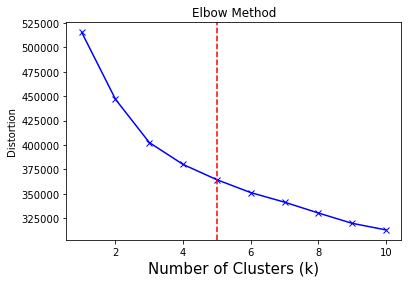

In [10]:
distortions = []
K = range(1, 11)  # Test for different values of k (e.g., 1 to 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize=15)
plt.ylabel('Distortion')
plt.title('Elbow Method')

plt.axvline(x=5, color='red', linestyle='--') #קו ב5

plt.show()

#### ככל שנגדיל את מספר הקבוצות שאנו רוצים לסווג אליהם השונות תקטן. לפי הגרף נבחר לסווג לפי 5 קבוצות כי שם השיפוע מתחיל להיות פחות חד כלומר כל הגדלה של מספר הקבוצות (K) הוא פחות משמעותי   

סיווג ל5 קבוצות עם האלגוריתם מבוסס מרחק

In [11]:
data = df_pca

# Choose the number of clusters
k = 5

# Initialize the k-means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the algorithm to the data
kmeans.fit(data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels back to the dataframe
df_pca['Cluster'] = cluster_labels
df_pca

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Cluster
0,-0.598268,-0.108719,-1.221948,-0.011565,-0.531337,-0.058432,-0.236670,-0.070581,-0.132735,-0.135593,...,-0.132957,0.117052,-0.129987,-0.235753,0.063606,-0.014989,0.890980,0.074289,-0.054034,2
1,1.244308,0.431499,-1.037999,-0.439086,-0.567716,-0.126313,-0.133953,0.102293,-0.288534,1.116817,...,0.355329,0.018733,-0.544454,-0.162325,0.142961,-0.065487,0.916679,0.020008,-0.103905,4
2,-0.618763,-0.427845,0.200915,0.039200,0.520165,-0.214895,-0.004318,-0.076622,1.184051,0.074242,...,0.692546,0.867906,0.469462,-0.296894,0.278934,0.025406,-0.328048,0.559542,0.990791,2
3,-0.721341,0.289374,-0.306330,-0.969800,-0.054458,0.798597,0.164836,-0.201942,-0.221718,1.100280,...,0.006417,-0.039612,0.298627,-0.316417,0.548529,-0.367611,-0.373873,-0.212156,-0.283566,2
4,-0.835569,-0.066469,-0.716701,0.009981,1.212711,-0.455200,0.652856,0.012782,-0.272547,0.085589,...,0.086754,-0.107999,0.290251,-0.321106,0.581438,-0.305876,-0.378441,-0.275462,-0.311658,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,-0.468128,1.773485,-0.721368,-0.044436,-0.870800,0.201739,0.075485,-0.166664,-0.257720,-0.424201,...,0.311034,0.104700,-0.067617,-0.282640,-0.254760,-0.122312,-0.033718,0.161386,-0.226827,3
118563,-0.422098,1.526742,0.782338,1.283968,0.167243,-0.399056,-0.647321,-0.115179,0.719600,-0.118328,...,0.362304,0.470313,-0.209303,-0.524424,-0.499958,-0.301905,0.058151,0.016212,0.097336,3
118564,-0.815627,-0.451085,-0.228810,-0.989637,0.270246,-0.810909,0.225262,-0.491286,-0.154610,-0.137937,...,0.199545,0.170632,-0.000669,-0.435037,-0.170419,-0.094706,-0.113895,0.040011,-0.185514,2
118565,0.439673,1.564889,-0.061130,-1.037514,0.019982,0.626972,-0.454670,0.460916,-0.458231,-0.427061,...,-0.337813,0.465331,-0.212063,-0.247035,-0.148016,-0.247834,-0.054485,0.055478,-0.338954,3


### הוספה של העמודה של הסיווג לדאטה המקורי עם כל העמודות כדי שנוכל לחקור את הקבוצות השונות ולהבין את המשמעות שלהן 

In [12]:
# Add the cluster labels back to the original dataframe
df['Cluster'] = cluster_labels
df

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL,Cluster
0,1.0,0.357143,0.558140,0.451748,0.613359,0.625,0.652174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,1.0,0.357143,0.604651,0.579439,0.417745,0.625,0.391304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,0.0,0.571429,0.883721,0.434122,0.536558,0.625,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.500000,0.860465,0.520532,0.633308,0.625,0.304348,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,0.0,0.500000,0.790698,0.347193,0.438044,0.625,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,1.0,0.500000,0.860465,0.467650,0.461908,1.000,0.260870,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3
118563,1.0,0.500000,0.604651,0.447814,0.577559,1.000,0.869565,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
118564,0.0,0.357143,0.837209,0.381723,0.638353,1.000,0.782609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
118565,1.0,0.500000,0.837209,0.416223,0.603161,1.000,0.565217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3


כמות הנקודות בדאטה בכל סיווג 

In [13]:
print(df['Cluster'].value_counts())

2    29654
1    28719
3    20934
4    20051
0    19209
Name: Cluster, dtype: int64


סיווג של כל שורה בדאטה

In [14]:
df['Cluster'] 

0         2
1         4
2         2
3         2
4         2
         ..
118562    3
118563    3
118564    2
118565    3
118566    3
Name: Cluster, Length: 118567, dtype: int32

# לאחר שסיווגנו את הנתונים ל4 קבוצות השלב הבא הוא לנסות להבין מדוע נקודות הנתונים מסווגות לאותה קבוצה ומה ניתן ללמוד מכך   

## נעתיק את העמודה של הסיווג לדאטה לפני הנרמול כדי שנוכל לראות את הנתונים הלא מנורמלים

In [15]:
path = "C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting_encoding.csv"
df_original = pd.read_csv(path, encoding='latin1')
df_original['Cluster'] = cluster_labels
df_original

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL,Cluster
0,1,25.0,2004.0,39.080062,-77.097845,2020,15,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1,1,25.0,2006.0,39.175230,-77.241090,2020,9,0,0,0,...,0,0,0,0,1,0,0,0,0,4
2,0,40.0,2018.0,39.066925,-77.154085,2020,6,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,0,35.0,2017.0,39.131327,-77.083237,2020,7,0,0,0,...,0,1,0,0,0,1,0,0,0,2
4,0,35.0,2014.0,39.002137,-77.226225,2020,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,1,35.0,2017.0,39.091914,-77.208750,2023,6,0,0,0,...,0,0,1,0,1,0,0,0,0,3
118563,1,35.0,2006.0,39.077130,-77.124061,2023,20,0,0,0,...,0,0,0,0,1,0,0,0,0,3
118564,0,25.0,2016.0,39.027872,-77.079543,2023,18,0,0,0,...,0,0,0,0,0,0,0,0,1,2
118565,1,35.0,2016.0,39.053585,-77.105313,2023,13,0,0,0,...,0,0,0,0,0,1,0,0,0,3


### ייצוא הקובץ למחשב לאחר הסיווג (החלוקה לקבוצות)

In [16]:
output_path = "C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting_Cluster.csv"
df_original.to_csv(output_path, index=False)

## heatmap - על 20 העמודות שצמצמנו עם pca 

## Driver At Fault

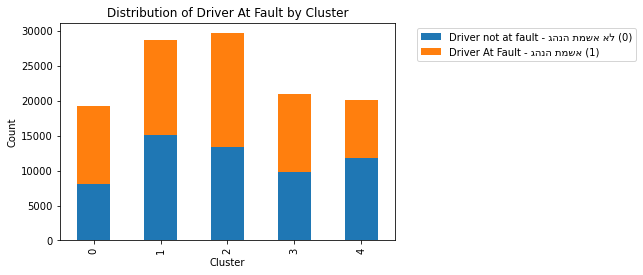

In [17]:
grouped_data = df_original.groupby(['Cluster', 'Driver At Fault']).size().unstack()

# Create the stacked bar plot
grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Driver At Fault by Cluster')

# Move the legend to the side
plt.legend(['Driver not at fault - גהנה תמשא אל (0)', 'Driver At Fault - גהנה תמשא (1)'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Speed Limit

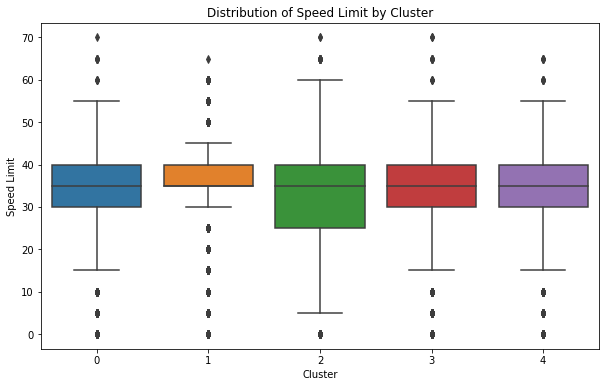

In [18]:
# Create a box plot to visualize the distribution of speed limits for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Speed Limit', data=df_original)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Speed Limit')
plt.title('Distribution of Speed Limit by Cluster')

# Show the plot
plt.show()


## Vehicle Year

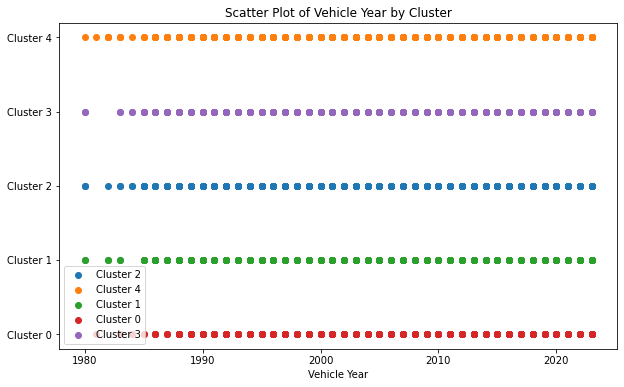

In [19]:
# Separate the data by clusters
clusters = df_original['Cluster'].unique()

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for cluster in clusters:
    cluster_data = df_original[df_original['Cluster'] == cluster]
    plt.scatter(cluster_data['Vehicle Year'], [cluster] * len(cluster_data), label=f'Cluster {cluster}')

# Customize the plot
plt.yticks(clusters, [f'Cluster {cluster}' for cluster in clusters])
plt.xlabel('Vehicle Year')
plt.title('Scatter Plot of Vehicle Year by Cluster')
plt.legend()

# Show the plot
plt.show()


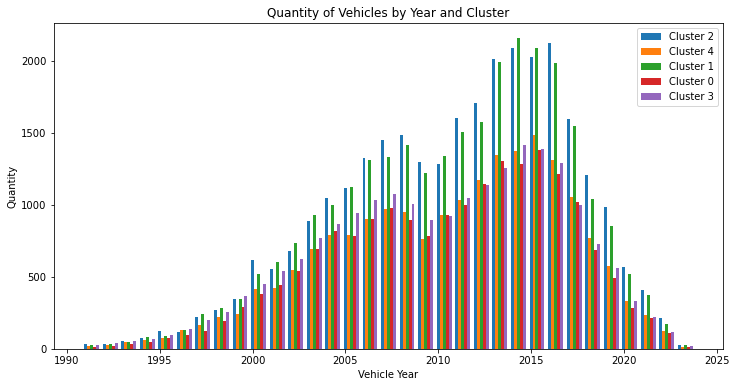

In [20]:
# Filter the data to include only years above 1990
filtered_data = df_original[df_original['Vehicle Year'] > 1990]

# Group the filtered data by 'Vehicle Year' and 'Cluster' and calculate the counts
grouped_data = filtered_data.groupby(['Vehicle Year', 'Cluster']).size().unstack()

# Get the unique clusters
clusters = filtered_data['Cluster'].unique()

# Set the x-axis as the 'Vehicle Year'
x = grouped_data.index

# Set the width of each bar
bar_width = 0.8 / len(clusters)

# Plot the bars for each cluster
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    plt.bar(x + i * bar_width, grouped_data[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Vehicle Year')
plt.ylabel('Quantity')
plt.title('Quantity of Vehicles by Year and Cluster')
plt.legend()

# Show the plot
plt.show()


## Longitude Latitude 

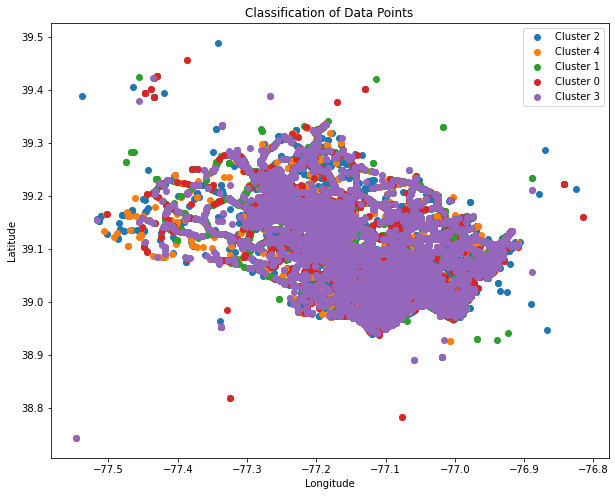

In [21]:
# Create separate DataFrames for each cluster
clusters = df_original['Cluster'].unique()

# Create the scatter plot
plt.figure(figsize=(10, 8))
for cluster in clusters:
    cluster_data = df_original[df_original['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')
    
# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Classification of Data Points')
plt.legend()

# Show the plot
plt.show()


## Year

#### השנה שבה התאונה קרתה 

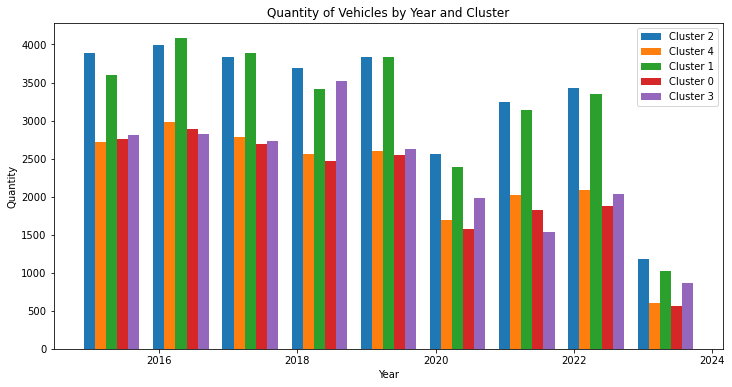

In [22]:
# Group the data by 'Vehicle Year' and 'Cluster' and calculate the counts
grouped_data = df_original.groupby(['Year', 'Cluster']).size().unstack()

# Get the unique clusters
clusters = df_original['Cluster'].unique()

# Set the x-axis as the 'Vehicle Year'
x = grouped_data.index

# Set the width of each bar
bar_width = 0.8 / len(clusters)

# Plot the bars for each cluster
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    plt.bar(x + i * bar_width, grouped_data[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Quantity of Vehicles by Year and Cluster')
plt.legend()

# Show the plot
plt.show()


## Hour

#### השעה שבה התאונה קרתה

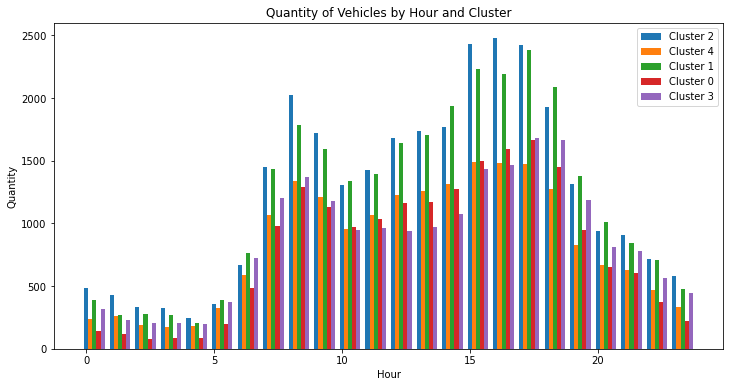

In [23]:
# Group the data by 'Vehicle Year' and 'Cluster' and calculate the counts
grouped_data = df_original.groupby(['Hour', 'Cluster']).size().unstack()

# Get the unique clusters
clusters = df_original['Cluster'].unique()

# Set the x-axis as the 'Vehicle Year'
x = grouped_data.index

# Set the width of each bar
bar_width = 0.8 / len(clusters)

# Plot the bars for each cluster
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    plt.bar(x + i * bar_width, grouped_data[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title('Quantity of Vehicles by Hour and Cluster')
plt.legend()

# Show the plot
plt.show()


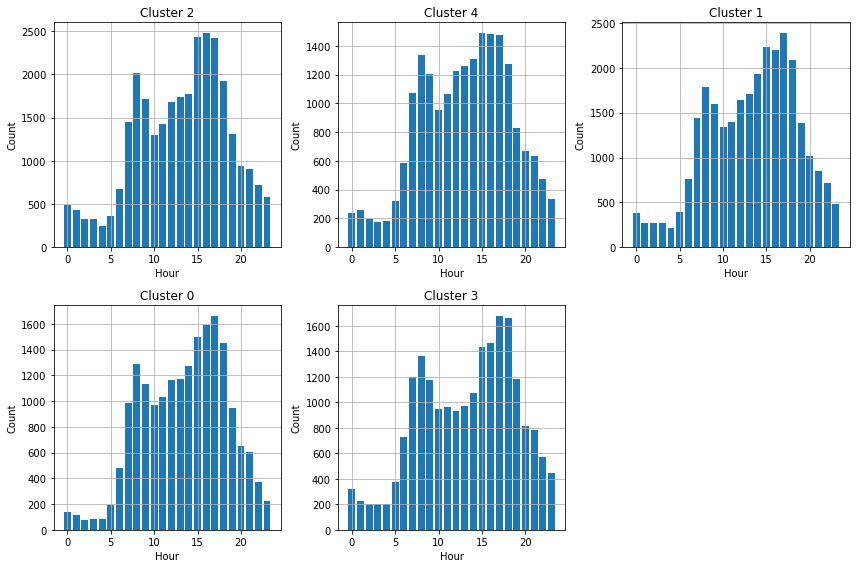

In [24]:
# Get the unique cluster values
clusters = df_original['Cluster'].unique()

# Set the figure size and layout
plt.figure(figsize=(12, 8))
plt.tight_layout()

# Iterate over each cluster
for i, cluster in enumerate(clusters):
    # Filter the data for the current cluster
    cluster_data = df_original[df_original['Cluster'] == cluster]
    
    # Group the data by 'Hour' and calculate the counts
    grouped_data = cluster_data['Hour'].value_counts().sort_index()
    
    # Create a subplot for the current cluster
    plt.subplot(2, 3, i+1)
    
    # Plot the data as a bar plot
    plt.bar(grouped_data.index, grouped_data.values)
    
    # Customize the plot
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster}')
    plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


## Agency Name

<Figure size 864x432 with 0 Axes>

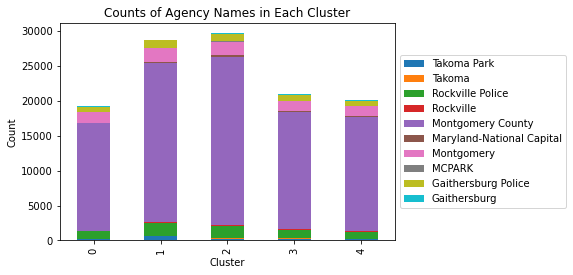

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the names for each Agency Name
agency_names = {
    'Agency Name_Takoma Park Police Depart': 'Takoma Park',
    'Agency Name_TAKOMA': 'Takoma',
    'Agency Name_Rockville Police Departme': 'Rockville Police',
    'Agency Name_ROCKVILLE': 'Rockville',
    'Agency Name_Montgomery County Police': 'Montgomery County',
    'Agency Name_Maryland-National Capital': 'Maryland-National Capital',
    'Agency Name_MONTGOMERY': 'Montgomery',
    'Agency Name_MCPARK': 'MCPARK',
    'Agency Name_Gaithersburg Police Depar': 'Gaithersburg Police',
    'Agency Name_GAITHERSBURG': 'Gaithersburg'
}

# Select the columns for Agency Name and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(agency_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Agency Name
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Agency Names in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [agency_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## ACRS Report Type

#### חומרת התאונה 
#### Property Damage Crash, Injury Crash, Fatal Crash

<Figure size 720x3600 with 0 Axes>

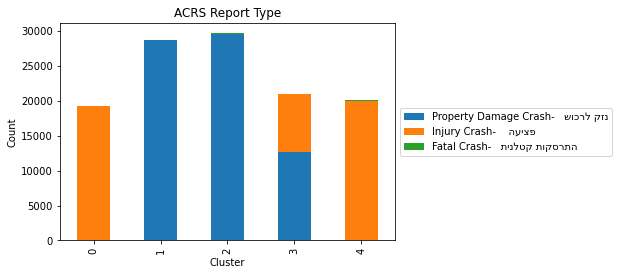

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the binary columns of Report Type and a 'Cluster' column

# Define the report type names and their corresponding labels
report_type_names = {
    'ACRS Report Type_Property Damage Crash': 'Property Damage Crash-   שוכרל קזנ',
    'ACRS Report Type_Injury Crash': 'Injury Crash-    העיצפ',
    'ACRS Report Type_Fatal Crash': 'Fatal Crash-   תינלטק תוקסרתה'
}

# Get the actual column names from the DataFrame
column_names = df_original.columns

# Map the report type names to the closest matching column names
mapped_names = {}
for report_type_name, label in report_type_names.items():
    best_match = max(column_names, key=lambda x: fuzz.ratio(report_type_name, x))
    mapped_names[best_match] = label

# Select the columns for the desired report types
selected_columns = ['Cluster'] + list(mapped_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Report Type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(10, 50))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('ACRS Report Type')

# Change the legend labels to the desired names
handles, labels = ax.get_legend_handles_labels()
labels = [report_type_names[label] for label in labels]
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()


##  Route Type 

<Figure size 864x432 with 0 Axes>

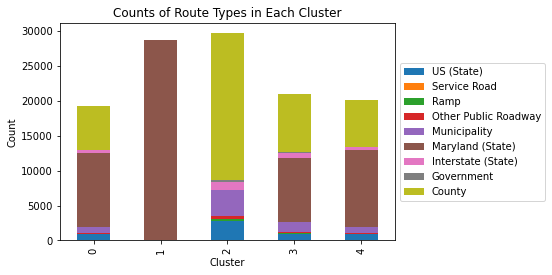

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the names for each Route Type
route_type_names = {
    'Route Type_US (State)': 'US (State)',
    'Route Type_Service Road': 'Service Road',
    'Route Type_Ramp': 'Ramp',
    'Route Type_Other Public Roadway': 'Other Public Roadway',
    'Route Type_Municipality': 'Municipality',
    'Route Type_Maryland (State)': 'Maryland (State)',
    'Route Type_Interstate (State)': 'Interstate (State)',
    'Route Type_Government': 'Government',
    'Route Type_County': 'County'
}

# Select the columns for Route Type and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(route_type_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Route Type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Route Types in Each Cluster')


# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [route_type_names[label] for label in labels]
ax.legend(handles, updated_labels,loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Weather

<Figure size 864x432 with 0 Axes>

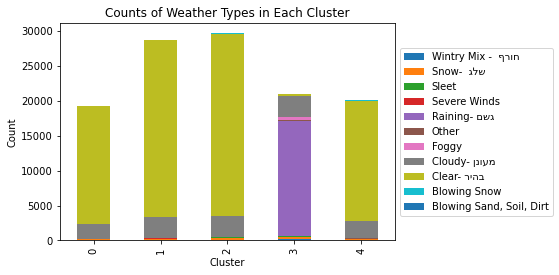

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the names for each Weather type
weather_names = {
    'Weather_WINTRY MIX': 'Wintry Mix -  ףרוח',
    'Weather_SNOW': 'Snow-  גלש',
    'Weather_SLEET': 'Sleet',
    'Weather_SEVERE WINDS': 'Severe Winds',
    'Weather_RAINING': 'Raining- םשג',
    'Weather_OTHER': 'Other',
    'Weather_FOGGY': 'Foggy',
    'Weather_CLOUDY': 'Cloudy- ןנועמ',
    'Weather_CLEAR': 'Clear- ריהב',
    'Weather_BLOWING SNOW': 'Blowing Snow',
    'Weather_BLOWING SAND, SOIL, DIRT': 'Blowing Sand, Soil, Dirt'
}

# Select the columns for Weather and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(weather_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Weather type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Weather Types in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [weather_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Surface Condition

<Figure size 864x432 with 0 Axes>

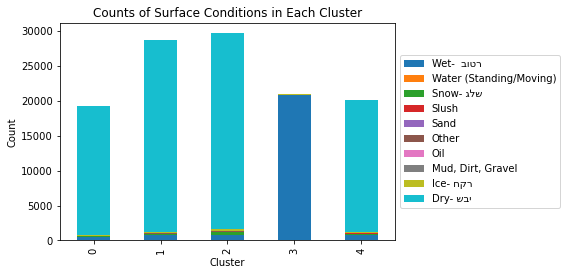

In [29]:
# Define the names for each Surface Condition type
surface_condition_names = {
    'Surface Condition_WET': 'Wet-  בוטר',
    'Surface Condition_WATER(STANDING/MOVING)': 'Water (Standing/Moving)',
    'Surface Condition_SNOW': 'Snow- גלש',
    'Surface Condition_SLUSH': 'Slush',
    'Surface Condition_SAND': 'Sand',
    'Surface Condition_OTHER': 'Other',
    'Surface Condition_OIL': 'Oil',
    'Surface Condition_MUD, DIRT, GRAVEL': 'Mud, Dirt, Gravel',
    'Surface Condition_ICE': 'Ice- חקר',
    'Surface Condition_DRY': 'Dry- שבי'
}

# Select the columns for Surface Condition and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(surface_condition_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Surface Condition type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Surface Conditions in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [surface_condition_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Light

<Figure size 864x432 with 0 Axes>

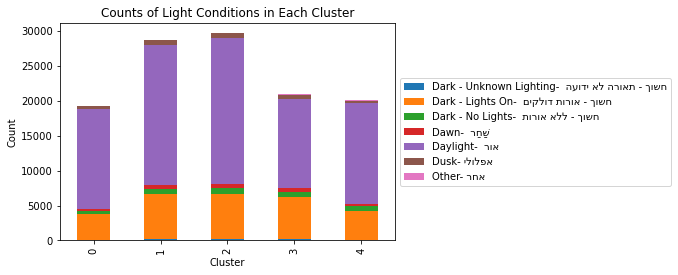

In [30]:
# Define the names for each Light condition
light_names = {
    'Light_DARK -- UNKNOWN LIGHTING': 'Dark - Unknown Lighting-  העודי אל הרואת - ךושח',
    'Light_DARK LIGHTS ON': 'Dark - Lights On-  םיקלוד תורוא - ךושח',
    'Light_DARK NO LIGHTS': 'Dark - No Lights-  תורוא אלל - ךושח',
    'Light_DAWN': 'Dawn-  רַחַׁש',
    'Light_DAYLIGHT': 'Daylight-  רוא',
    'Light_DUSK': 'Dusk- ילולפא',
    'Light_OTHER': 'Other- רחא'
}

# Select the columns for Light and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(light_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Light condition
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Light Conditions in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [light_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Injury Severity

<Figure size 864x432 with 0 Axes>

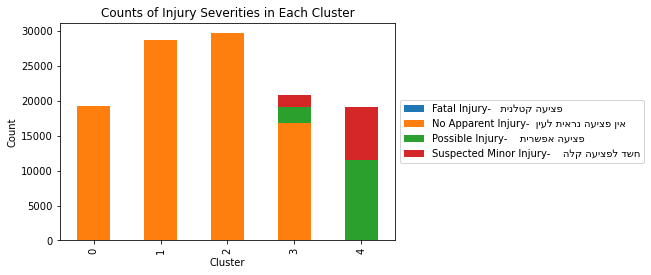

In [31]:
# Define the names for each Injury Severity
injury_severity_names = {
    'Injury Severity_FATAL INJURY': 'Fatal Injury-   תינלטק העיצפ',
    'Injury Severity_NO APPARENT INJURY': 'No Apparent Injury-  ןיעל תיארנ העיצפ ןיא',
    'Injury Severity_POSSIBLE INJURY': 'Possible Injury-    תירשפא העיצפ',
    'Injury Severity_SUSPECTED MINOR INJURY': 'Suspected Minor Injury-    הלק העיצפל דשח'
}

# Select the columns for Injury Severity and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(injury_severity_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Injury Severity
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Injury Severities in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [injury_severity_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Vehicle Damage Extent

<Figure size 864x432 with 0 Axes>

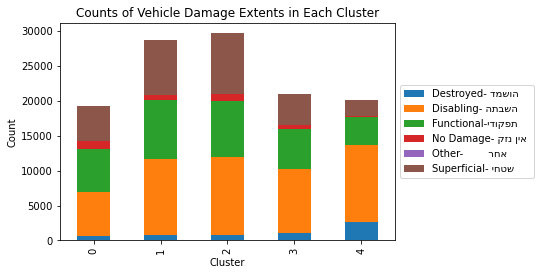

In [32]:
# Define the names for each Vehicle Damage Extent
vehicle_damage_extent_names = {
    'Vehicle Damage Extent_DESTROYED':  'Destroyed- דמשוה',
    'Vehicle Damage Extent_DISABLING':  'Disabling- התבשה',
    'Vehicle Damage Extent_FUNCTIONAL': 'Functional-ידוקפת',
    'Vehicle Damage Extent_NO DAMAGE':  'No Damage- קזנ ןיא ',
    'Vehicle Damage Extent_OTHER':      'Other-        רחא ',
    'Vehicle Damage Extent_SUPERFICIAL':'Superficial- יחטש'
}

# Select the columns for Vehicle Damage Extent and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(vehicle_damage_extent_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Vehicle Damage Extent
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Vehicle Damage Extents in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [vehicle_damage_extent_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


#### שמות של העמודות בדאטה